In [ ]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2023-03-23 19:05:13--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2023-03-23 19:05:15--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9a15b2e30cbfc3917090e87ab0.dl.dropboxusercontent.com/cd/0/inline/B4wLOdWZfIAe3u8Z7RQY2QVs6XXU-5qFXRgfpT7mkebLLTnDQtGLtRrdMZlUMgeOxQ1az7Z29D4l-h6BM5qIg6neiT92mxondYB-WNXeCDJOERMJEg2Sc6-dnFmVst9suvS6Ugk9d6JvgKBKNkO2HWCM_6jKLi9LggUbS_goheBVbQ/file# [following]
--2023-03-23 19:05:15--  https://uc9a15b2e30cbfc3917090e87ab0.dl.dropboxusercontent.com/cd/0/inline/B4wLOdWZfIAe3u8Z7RQY2QVs6XXU-5qFXRgfpT7mkebLLTnDQtGLtRrdMZlUMgeOxQ1az7Z29D4

In [ ]:
!unzip dataset.zip?dl=0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
#from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [ ]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

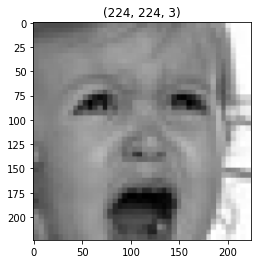

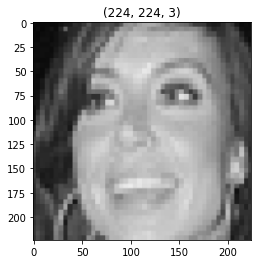

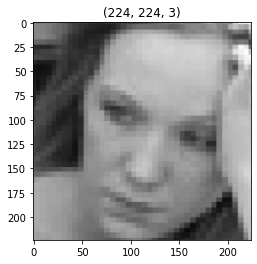

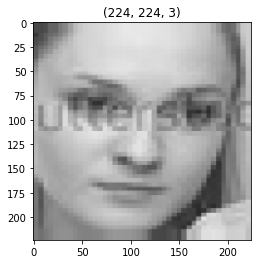

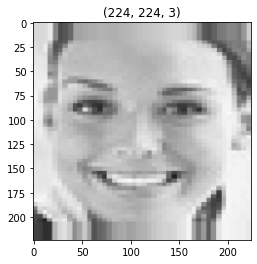

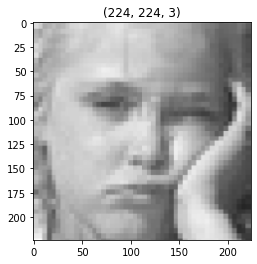

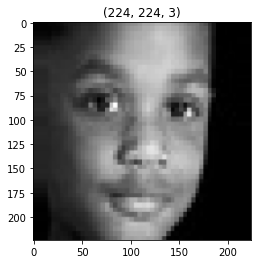

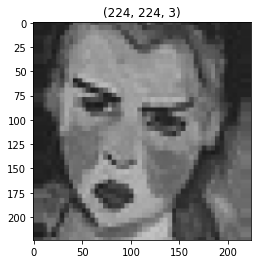

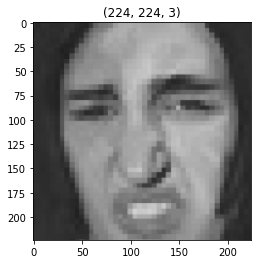

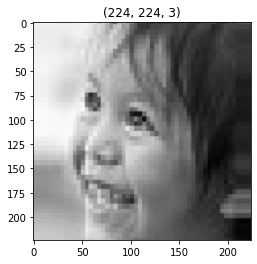

In [ ]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [ ]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

<ipython-input-12-f681b3c69731>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 18.3809 - accuracy: 0.1937
Epoch 1: val_accuracy improved from -inf to 0.27734, saving model to best_model.h5
10/10 [==============================] - 15s 569ms/step - loss: 18.3809 - accuracy: 0.1937 - val_loss: 17.7566 - val_accuracy: 0.2773
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 11.1307 - accuracy: 0.3219
Epoch 2: val_accuracy improved from 0.27734 to 0.43750, saving model to best_model.h5
10/10 [==============================] - 4s 408ms/step - loss: 11.1307 - accuracy: 0.3219 - val_loss: 5.6146 - val_accuracy: 0.4375
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 6.3183 - accuracy: 0.4250
Epoch 3: val_accuracy did not improve from 0.43750
10/10 [==============================] - 5s 486ms/step - loss: 6.3183 - accuracy: 0.4250 - val_loss: 6.2399 - val_accuracy: 0.3242
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 6.3996 - accuracy: 0.3438
Epoch

In [ ]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

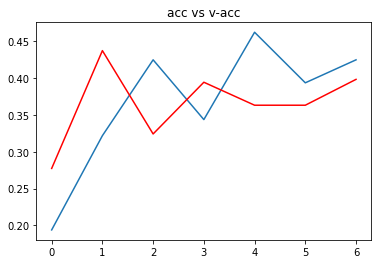

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

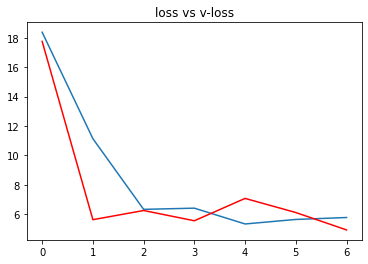

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [ ]:
#from keras.preprocessing.image_utils import img_to_array, load_img
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

1/1 [==============================] - 1s 715ms/step
 the image is of sad


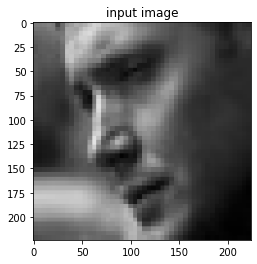

In [ ]:
# path for the image to see if it predics correct class

path = "/content/test/angry/PrivateTest_1054527.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()